Autorzy: <br>
Michał Puńko 155863 <br>
Jakub Plura 155829

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
import pandas as pd

## 1. Logistic regression

**Question** What is logistic regression? Does it really solve the regression problems?

Logistic regression is based on logit function which is a defined as log(odds), where odds is the share of the probability of "one" (p) and the probability of "zero" (1-p):

$$odds(p) = \frac{p}{1-p}$$
$$logit(p) = ln(odds(p)) = ln(\frac{p}{1-p})$$

**Example** We take at random one card from full deck of cards. We define success as taking a heart card. What are the values of probability of success, odds and logit in this example? <br/>

**Task** Generate in python two plots visualising the relation between: 
* probability and odds
* probability and logit

What is the value range for thise 3 functions (probability, odds and logit)?

In [ ]:
def odds(p):
    return p / (1 - p)


def logit(p):
    return np.log(odds(p))

In [81]:
prop_heart = 13 / 52
odds_heart = odds(prop_heart)
logit_heart = logit(prop_heart)

print(f"Probability: {prop_heart}")
print(f"Odds: {odds_heart}")
print(f"Logit: {logit_heart}")

Probability: 0.25
Odds: 0.3333333333333333
Logit: -1.0986122886681098


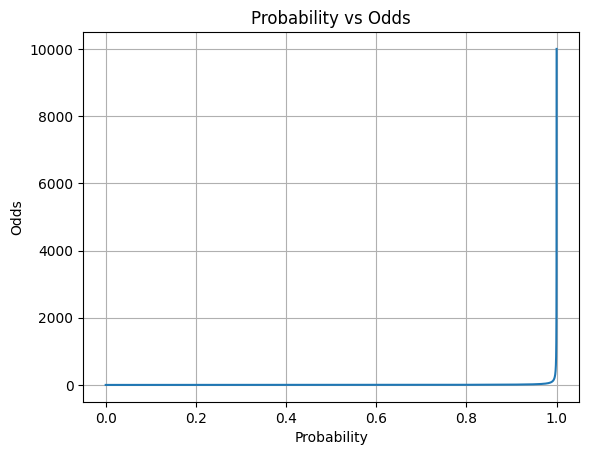

In [82]:
p = np.linspace(0.0001, 0.9999, 10000)
odds_values = odds(p)
logit_values = logit(p)

plt.figure()
plt.plot(p, odds_values)
plt.xlabel("Probability")
plt.ylabel("Odds")
plt.title("Probability vs Odds")
plt.grid()
plt.show()

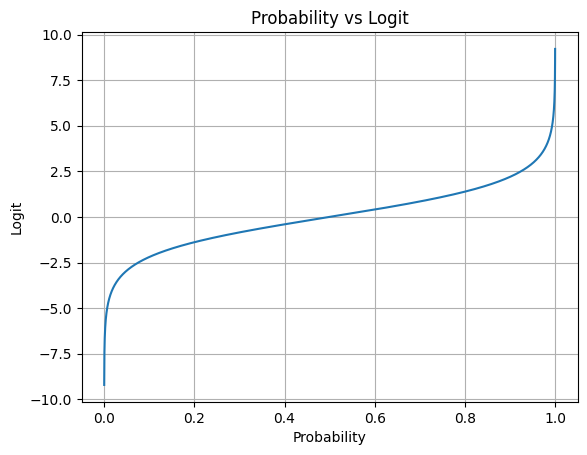

In [83]:
plt.figure()
plt.plot(p, logit_values)
plt.xlabel("Probability")
plt.ylabel("Logit")
plt.title("Probability vs Logit")
plt.grid()
plt.show()

## 2. Simple logistic regression
Let's start with simple logistic regression - with only one independent variable. We will work on the example from english Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression). We want to build a logistic regression model for estimating probability of passing an exam based on the time spent on studying:


|Hours|	0.50|0.75|1.00|1.25|1.50|1.75|1.75|2.00|2.25|2.50|2.75|3.00|3.25|3.50|4.00|4.25|4.50|4.75|5.00|5.50|
|-----|-----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
|Pass |0    |0   |0   |0   |0   |0   |1   |0   |1   |0   |1   |0   |1   |0   |1   |1   |1   |1   |1   |1   |

1 - student passed, 0 - student failed

In [84]:
hours = [
    0.5,
    0.75,
    1,
    1.25,
    1.5,
    1.75,
    1.75,
    2,
    2.25,
    2.5,
    2.75,
    3,
    3.25,
    3.5,
    4,
    4.25,
    4.5,
    4.75,
    5,
    5.5,
]
hours = np.array(hours).reshape(-1, 1)
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

Let's use the scatter plot to visualize our data. Can you intuitively find a threshold - after how long studying students usually pass the test?

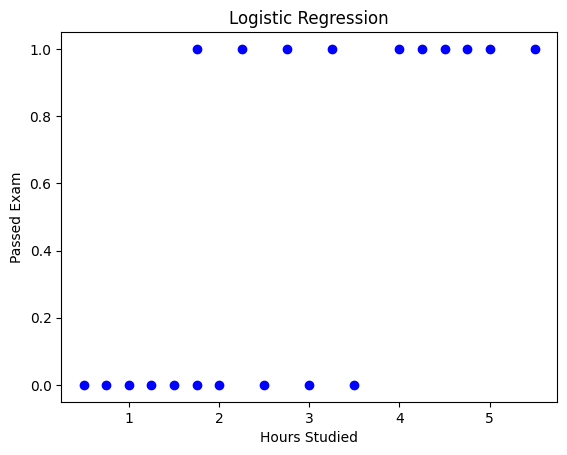

In [85]:
plt.figure()
plt.scatter(hours, passed, color="blue", label="Data points")
plt.xlabel("Hours Studied")
plt.ylabel("Passed Exam")
plt.title("Logistic Regression")
plt.show()

We define the logit function as the linear combination of independent variables. In simple regression case we have only one variable x:

$$logit(p) = ln(\frac{p}{1-p}) = \beta_0 + \beta_1\cdot x,$$
so the estimated odds value is equal to:
$$\frac{p}{1-p} = e^{\beta_0 + \beta_1\cdot x}.$$

The estimation of $\beta$ coefficient is being done with the maximum likelihood estimation method (https://online.stat.psu.edu/stat415/lesson/1/1.2).

**Task** Use Logistic Regression from scikit learn to obtain the regression coefficients in our problem.

In [86]:
model = LogisticRegression()
model.fit(hours, passed)
print("Model coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for hours studied: {model.coef_}")

Model coefficients:
Intercept: [-3.14004565]
Coefficient for hours studied: [[1.14881183]]


**Question** Having the coefficients how can we determine what is the probability that student who studied for 4.25h will pass the test?

**Task** Write the body of function which calculates this probability having the $\beta_0$ and $\beta_1$ coefficients and the study time (x). Using this function and coefficients obtained with previous task find the answer for previous question (the probability of passing the test after 4.25 hours of studying). <br/>
_Tip: np.exp() function can be useful_

In [87]:
def calculate_probability(beta_0, beta_1, x):
    # TODO
    odds = np.exp(beta_0 + beta_1 * x)
    probability = odds / (1 + odds)
    return probability


# TODO fill with regression coefficients from previous task
calculate_probability(0, 0, 4.25)

np.float64(0.5)

**Task** Let's visualize the probability function - p(studying hours), to your previous scatter add a line showing the relation between studying time and the probability of passing. Can you see something interesting about this function? Do you know how this type of function is called?

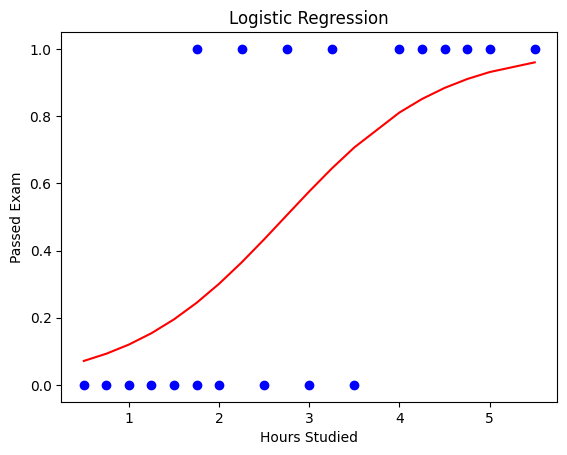

In [ ]:
plt.figure()
plt.scatter(hours, passed, color="blue", label="Data points")
plt.plot(
    hours,
    calculate_probability(model.intercept_[0], model.coef_[0][0], hours),
    color="red",
    label="Logistic Regression Fit",
)
plt.xlabel("Hours Studied")
plt.ylabel("Passed Exam")
plt.title("Logistic Regression")
plt.show()

Let's check if the probability which we calculated is the same as this returned with out fit logistic regression model from scikit learn. Use predict_proba function to find the probability of studying 4.25h. <br/>
_Tip: predict_proba requires 2D array or list of lists as input, so [[4.25]] should be passed_

In [89]:
model.predict_proba([[4.25]])

array([[0.14900776, 0.85099224]])

We may also not want to obtain the probabilities, but just the more probable class (whether student will pass or not). To obtain this class use the predict function on the model:

In [90]:
model.predict([[4.25]])

array([1])

## 3. Multiple logistic regression

More typical real-world use case is the multiple logistic regression, where the value of some binary class depends on more than one factor. In this part we will work on the dataset containing data about whether given person is diabetic or not.

Let's start with reading the data from "diabetes_scaled.csv" file. The data have already been scaled.

In [91]:
data = pd.read_csv("diabetes_scaled.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Firstly, we add the intercept column (value equal to 1 for all rows), just for easier futher analysis.

In [92]:
# TODO add column
data.head()

data["intercept"] = 1

Y = data["Class"]
X = data.drop("Class", axis=1)

Next, we divide our data into train and test. Let's just leave last 100 cases in the test set, the remaining ones will be the training examples.

In [93]:
X_train = X[:-100]
X_test = X[-100:]
Y_train = Y[:-100]
Y_test = Y[-100:]

print(f"Data: {data.shape}")
print(f"X Train: {X_train.shape}")
print(f"Y Train: {Y_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"Y Test: {Y_test.shape}")

Data: (768, 10)
X Train: (668, 9)
Y Train: (668,)
X Test: (100, 9)
Y Test: (100,)


Use the scikit learn implementation of the logistic regression to build the model on the training set. What are the obtained regression coefficients?

In [94]:
model = LogisticRegression()
model.fit(X_train, Y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [-0.87962052]
Coefficients: [[ 0.44980174  1.03283414 -0.25579399  0.0252127  -0.10118449  0.75785671
   0.34360905  0.13162502  0.00940739]]


Now, evaluate your model on the test examples. Classify the test examples, find the probabilitiy of diabetes disease for each test case and the overall accuracy score.

In [101]:
predictions = model.predict(X_test)

probabilities = model.predict_proba(X_test)

prob_diabetes = model.predict_proba(X_test)[:, 1]

accuracy = model.score(X_test, Y_test)

print(f"Predictions: {predictions}\n")
print(f"Probabilities: {probabilities[:5]}\n")
print(f"Probabilities of having diabetes: {prob_diabetes[:5]}\n")
print(f"Accuracy: {accuracy}")

Predictions: [0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0]

Probabilities: [[0.72982679 0.27017321]
 [0.38338614 0.61661386]
 [0.21664222 0.78335778]
 [0.92032543 0.07967457]
 [0.87183297 0.12816703]]

Probabilities of having diabetes: [0.27017321 0.61661386 0.78335778 0.07967457 0.12816703]

Accuracy: 0.8
